<a href="https://colab.research.google.com/github/kurihara-ryo/cesarean-pasaran/blob/main/%E3%80%90%E8%A7%A3%E7%AD%94%E4%BE%8B%E3%80%91%E6%BC%94%E7%BF%92%E8%AA%B2%E9%A1%8C_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E2%85%A2_0506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#【課題】と書いてあるセルでは、自分でプログラムを作成してください。
# 実行ボタンを押してプログラムの動作確認を行い、Google Classroomから提出してください。
# 提出する際は、コメント(#から始まる部分)を削除せずに残してください。
# 〆切が近いので、後回しにせず講義時間中に手を動かしてプログラムを作成すること。

In [ ]:
#### おさらい：主成分分析(PCA)
# 「プログラミングⅡ」でも扱った、PCAによる次元削減について復習します。

# 日本の気温データを使用します。
import numpy as np
import pandas as pd
import gdown
url='https://drive.google.com/uc?export=download&id=1WsveWEwULst41FLQmcgfBGQsejWf6COG'
gdown.download(url, 'japan_temperature.csv', quiet=False)
df = pd.read_csv('japan_temperature.csv')
display(df)

Downloading...
From: https://drive.google.com/uc?export=download&id=1WsveWEwULst41FLQmcgfBGQsejWf6COG
To: /content/japan_temperature.csv
100%|██████████| 52.8k/52.8k [00:00<00:00, 65.1MB/s]


,年,月,日,札幌,青森,秋田,福島,千葉,東京,横浜,...,徳島,高知,福岡,大分,佐賀,熊本,長崎,宮崎,鹿児島,那覇
0,2023,4,30,14.3,14.4,14.3,17.6,20.5,19.7,20.4,...,18.4,18.7,16.7,17.7,16.9,16.3,16.0,17.8,17.2,23.0
1,2023,5,1,11.3,13.5,13.8,17.2,17.8,17.8,18.1,...,17.5,18.2,16.8,17.1,16.6,16.5,16.1,18.0,18.3,22.1
2,2023,5,2,10.7,11.5,11.8,14.1,17.1,17.4,17.6,...,16.9,16.9,17.7,16.0,17.7,18.0,17.2,16.7,18.5,22.8
3,2023,5,3,14.7,15.5,12.9,16.5,18.2,17.8,18.5,...,17.8,17.6,19.7,17.9,19.2,18.9,18.2,16.6,19.5,23.5
4,2023,5,4,17.1,19.4,14.5,19.9,20.0,19.7,19.9,...,20.0,19.2,20.2,19.9,18.1,17.9,17.1,18.5,19.7,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2024,4,26,15.6,18.1,16.5,20.9,20.5,20.3,20.4,...,17.8,17.9,17.4,16.8,18.0,17.7,17.5,18.2,18.2,24.4
363,2024,4,27,18.2,16.1,17.2,21.0,19.6,19.5,19.3,...,18.2,18.8,19.2,16.7,19.9,20.0,19.2,18.6,20.7,26.0
364,2024,4,28,12.0,16.4,15.6,22.6,21.1,21.6,20.9,...,19.9,20.7,20.8,18.7,22.4,23.1,21.9,21.0,22.8,26.3
365,2024,4,29,10.8,15.4,16.9,18.5,21.3,21.2,21.0,...,18.8,19.2,21.4,18.2,21.6,21.7,21.4,21.1,22.4,25.1


In [ ]:
# データフレームには、367の日付と29の都市に関する気温が入っています。
# これを「29の都市それぞれが367次元の気温情報として表されたデータ」と見て、
# PCAで次元削減を行います。

# 準備として、まず気温の部分を抜き出します。
df_part = df.iloc[:, 3:]
# 次に行と列を入れ換えて、行を都市、列を日付にします。
# 行と列を入れ換える処理(転置)は、「行列名.T」で行えます。
df_part = df_part.T
display(df_part)

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
札幌,14.3,11.3,10.7,14.7,17.1,15.2,11.0,10.8,9.8,12.0,...,7.3,7.8,10.3,10.1,11.3,15.6,18.2,12.0,10.8,10.7
青森,14.4,13.5,11.5,15.5,19.4,18.9,12.1,10.3,6.2,13.7,...,11.1,11.1,12.0,14.8,13.1,18.1,16.1,16.4,15.4,12.6
秋田,14.3,13.8,11.8,12.9,14.5,16.7,14.5,13.2,7.6,11.2,...,9.8,13.7,17.3,15.7,12.5,16.5,17.2,15.6,16.9,15.4
福島,17.6,17.2,14.1,16.5,19.9,20.9,20.1,11.2,9.7,13.0,...,15.7,15.9,13.5,13.8,16.9,20.9,21.0,22.6,18.5,20.3
千葉,20.5,17.8,17.1,18.2,20.0,21.3,22.6,17.7,13.2,15.0,...,18.2,16.3,16.9,15.9,18.9,20.5,19.6,21.1,21.3,21.3
東京,19.7,17.8,17.4,17.8,19.7,21.1,23.0,17.6,12.9,15.1,...,18.4,15.6,16.9,15.0,19.5,20.3,19.5,21.6,21.2,20.9
横浜,20.4,18.1,17.6,18.5,19.9,20.6,22.5,18.4,13.6,15.6,...,18.6,15.8,17.1,15.2,19.3,20.4,19.3,20.9,21.0,20.8
静岡,20.2,19.4,17.1,18.5,19.8,20.4,22.8,21.1,19.5,16.6,...,18.8,18.5,18.6,16.1,20.0,20.9,18.9,19.9,19.9,20.8
岐阜,17.1,16.5,16.9,18.6,20.0,20.2,21.5,19.6,17.7,17.0,...,17.9,19.8,17.6,15.8,19.0,19.3,19.9,21.9,20.2,19.0
富山,16.3,15.1,14.5,16.9,19.1,21.0,22.3,13.9,12.4,13.4,...,13.9,13.7,14.1,15.0,17.3,17.3,17.9,18.6,16.5,17.1


In [ ]:
# 「プログラミングⅡ」の最終回で学んだように、
# PCAの流れは以下のようになります。

# 必要なモジュール一式を用意
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データの前処理
# 標準化：各特徴量を平均0、標準偏差1となるように変換
scaler = StandardScaler()
X = scaler.fit_transform(df_part)

# PCAのインスタンスを作成
# 2次元に次元削減
model = PCA(n_components=2)

# PCAを実行
pca_result = model.fit_transform(X)

# 結果を表示
print('次元削減されたデータ')
print(pca_result, '\n') # shapeは(データ数, 削減後の次元数)
print('各主成分の寄与率')
print(model.explained_variance_ratio_)

次元削減されたデータ
[[-4.40978581e+01 -1.23948653e+01]
 [-3.33896060e+01 -6.65878009e+00]
 [-2.50607971e+01 -1.99339217e+00]
 [-1.44103713e+01  4.64271817e+00]
 [ 5.34644100e+00  2.72051437e+00]
 [ 2.33814303e+00  4.12395190e+00]
 [ 4.51748724e+00  2.02224263e+00]
 [ 6.82885788e+00 -1.13028286e+00]
 [ 1.53064579e+00  7.31593775e+00]
 [-9.73101477e+00  7.29631995e+00]
 [-7.71345676e+00  7.28780217e+00]
 [-3.71389051e+00  3.20419307e+00]
 [ 3.83091671e+00  6.95316682e-01]
 [ 5.64599993e+00  6.51583646e+00]
 [ 1.68872938e+00  9.77786642e+00]
 [-4.67742770e+00  4.17353735e+00]
 [-2.32597136e+00  3.52123515e+00]
 [ 2.25191800e+00  2.80293482e+00]
 [-4.35965883e+00 -1.98069756e+00]
 [ 2.64056881e+00 -1.48140912e+00]
 [ 5.66797757e+00 -5.66078462e+00]
 [ 8.80619018e+00 -1.51694574e-02]
 [ 3.19809132e+00 -6.03038410e+00]
 [ 6.50109427e+00 -2.27736952e-02]
 [ 7.09036997e+00 -1.96507784e+00]
 [ 7.47628778e+00 -4.53651985e+00]
 [ 9.63858035e+00 -9.80584982e+00]
 [ 1.70648629e+01 -3.10339864e+00]
 [ 4.7416

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e57d5cade44cd5beb99017152ddb56e4e0e22a4b86082704e40d63f75031143c
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


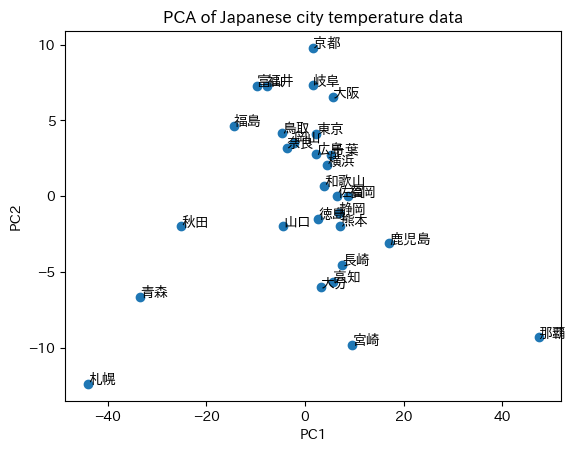

In [ ]:
# 結果を図示する例です。

import matplotlib.pyplot as plt
# 日本語表示用
!pip install japanize-matplotlib
import japanize_matplotlib

# 散布図を表示
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Japanese city temperature data')

# 図中に各点の地名を表示
# df_part.index[i]: i番目の都市名
# pca_result[i, 0]: i番目の点のx座標
# pca_result[i, 1]: i番目の点のy座標
for i in range(df_part.shape[0]):
    plt.annotate(df_part.index[i], xy=(pca_result[i, 0], pca_result[i, 1]))

# 第1主成分軸の片側には日本北部の都市が分布しており、その反対側には南部の都市が分布しています。
# このことから、第1主成分は日本の南北における気温の違いを表していると解釈できそうです。

【課題】PCAを用いて5次元に次元削減を行い、各主成分の寄与率を表示してください。また、第3主成分までの累積寄与率を計算して表示してください。


In [ ]:
# PCAのインスタンスを作成
# 5次元に次元削減
model = PCA(n_components=5)

# PCAを実行
pca_result = model.fit_transform(X)

# 結果を表示
print('各主成分の累積寄与率')
print(model.explained_variance_ratio_)
print('第3主成分までの累積寄与率')
print(np.sum(model.explained_variance_ratio_[:3]))

各主成分の累積寄与率
[0.67416704 0.08374249 0.06711944 0.03779894 0.0214338 ]
第3主成分までの累積寄与率
0.8250289697258882


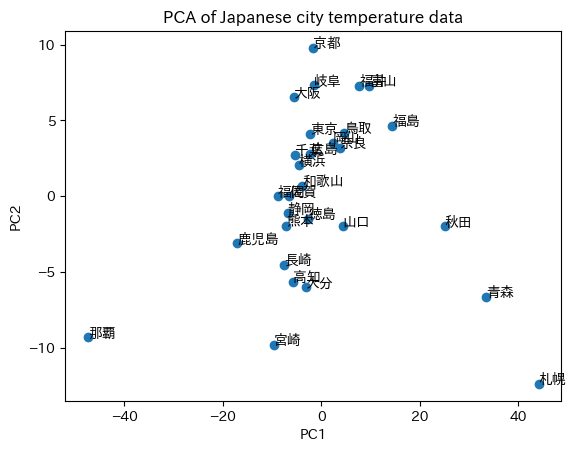

In [ ]:
# PCAは分散の大きさのみを考慮して計算されるため、主成分座標の符号には任意性があります。
# 同じデータを用いてPCAを行った場合でも、計算の環境によっては主成分座標の正負が逆の結果になることもあります。
# そのため、結果を図示する際に主成分座標の正負を逆にしても意味は変わりません。
# 以下の例は、第1主成分座標の正負を反転させて散布図を描いています。

# 第1主成分座標の正負を反転させて図示
# - pca_result[:, 0]の部分に注目
plt.scatter(- pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Japanese city temperature data')

# 地名の表示位置も同様に変更
for i in range(df_part.shape[0]):
    plt.annotate(df_part.index[i], xy=(- pca_result[i, 0], pca_result[i, 1]))

In [ ]:
#### t-SNE
# PCA以外の次元削減手法として、t-SNEもよく用いられます。
# t-SNEの場合も、全体の流れはPCAの場合と変わりません。

# モジュールの準備
from sklearn.manifold import TSNE

# データの前処理
scaler = StandardScaler()
X = scaler.fit_transform(df_part)

# t-SNEのインスタンスを作成
# 2次元に次元削減
# t-SNEのハイパラperplexityを5に設定
model = TSNE(n_components=2, perplexity=5)

# t-SNEを実行
tsne_result = model.fit_transform(X)

# 結果を表示
print('次元削減されたデータ')
print(tsne_result, '\n') # shapeは(データ数, 削減後の次元数)

次元削減されたデータ
[[  83.6537    -154.5119   ]
 [  92.16916   -139.60603  ]
 [  87.50215   -122.99518  ]
 [  93.01347    -89.625114 ]
 [-148.43317      8.8073225]
 [-149.41934     29.026615 ]
 [-134.4594      19.141981 ]
 [-118.389145     6.323432 ]
 [  -3.9193625   32.890575 ]
 [  71.5728     -79.62158  ]
 [  77.941605   -64.31428  ]
 [  15.243124   -11.006806 ]
 [ -36.49298     -4.1282687]
 [ -28.11083     23.824375 ]
 [ -21.620089    39.39496  ]
 [  70.08309    -49.707764 ]
 [  25.903513     1.9990829]
 [  32.25875     19.812143 ]
 [  48.703545    -3.9512398]
 [ -38.033333   -19.825396 ]
 [ -59.451447   -33.4234   ]
 [  36.4042     129.2385   ]
 [ -41.516754   -42.753143 ]
 [  20.204422   116.50215  ]
 [   4.7273755  122.51929  ]
 [  18.61663    138.72711  ]
 [ -73.966805   -50.76814  ]
 [  17.44816    163.84294  ]
 [  17.171595   184.97658  ]] 



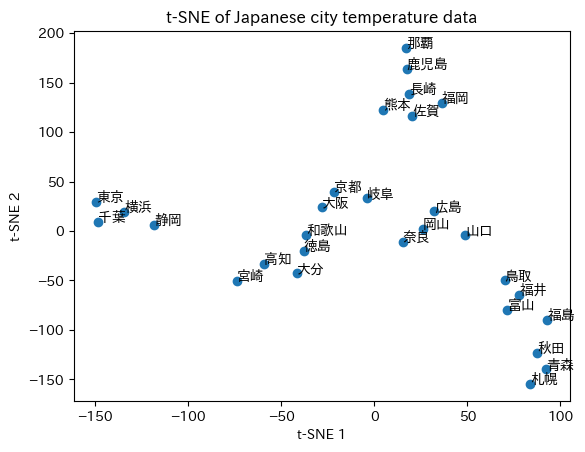

In [ ]:
# 散布図を表示
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Japanese city temperature data')

# 図中に各点の地名を表示
for i in range(df_part.shape[0]):
    plt.annotate(df_part.index[i], xy=(tsne_result[i, 0], tsne_result[i, 1]))

# t-SNEはデータ間の近傍関係を保つように次元削減する手法です。
# 散布図を見ると、地理的に近い都市が近くにプロットされている傾向にあります。
# このことから、地理的に近い都市は気温データも似ている傾向にあると解釈できそうです。
# PCAとは異なり、t-SNEでは次元削減後の軸に分散最大のような意味はありません。
# そのため、通常、軸の意味を解釈することは行われません。

次元削減されたデータ
[[ 1.8291775  -0.16842316]
 [ 1.9495355  -0.23701508]
 [ 2.1198282  -0.41453424]
 [ 2.7071974  -0.9600471 ]
 [ 3.4369595  -3.3901937 ]
 [ 3.474636   -3.1034622 ]
 [ 3.4033067  -3.3733711 ]
 [ 3.0306888  -3.74958   ]
 [ 2.8709795  -2.4668076 ]
 [ 2.5116055  -1.3292459 ]
 [ 2.4225483  -1.5496094 ]
 [ 2.4742436  -2.234585  ]
 [ 2.5111108  -3.1403408 ]
 [ 2.7339213  -2.8586774 ]
 [ 2.8600914  -2.3633773 ]
 [ 2.1563778  -1.7509059 ]
 [ 2.224339   -2.4083667 ]
 [ 1.9126959  -2.7538743 ]
 [ 1.6724539  -2.3501303 ]
 [ 2.347033   -3.1634405 ]
 [ 2.318675   -3.8188717 ]
 [ 1.4182509  -3.678397  ]
 [ 2.0886707  -3.5508783 ]
 [ 1.4388174  -3.3750708 ]
 [ 1.5312585  -3.5416777 ]
 [ 1.5944211  -3.7985177 ]
 [ 2.28675    -4.361036  ]
 [ 1.7434396  -4.499026  ]
 [ 1.9956974  -5.247335  ]] 



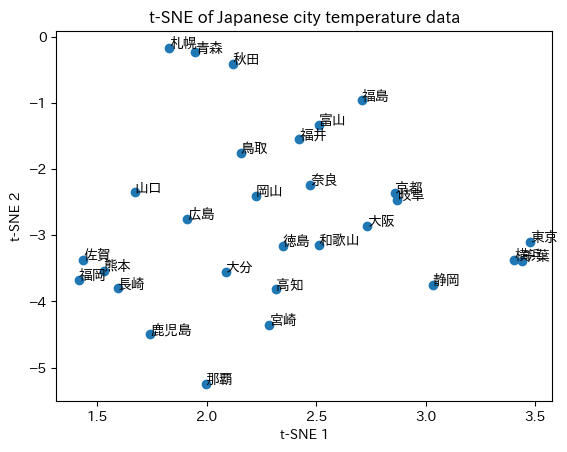

In [ ]:
# t-SNEの結果はハイパラperplexityの値によって変化します。
# 以下の例では、perplexityを20に設定しています。

# t-SNEのインスタンスを作成
# perplexityを20に設定
model = TSNE(n_components=2, perplexity=20)

# t-SNEを実行
tsne_result = model.fit_transform(X)

# 結果を表示
print('次元削減されたデータ')
print(tsne_result, '\n')

# 散布図を表示
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Japanese city temperature data')

# 図中に各点の地名を表示
for i in range(df_part.shape[0]):
    plt.annotate(df_part.index[i], xy=(tsne_result[i, 0], tsne_result[i, 1]))

# 先ほどのperplexity=5の場合と比べて、
# 点同士がばらけてプロットされています。

【課題】perplexityの値を10に設定して2次元へのt-SNEを行い、結果を散布図で表示してください。

次元削減されたデータ
[[ -9.142069   -13.701788  ]
 [ -6.5413027  -14.235929  ]
 [ -4.6341705  -12.17871   ]
 [ -5.78804     -7.48148   ]
 [-12.791509    13.030252  ]
 [-12.495505     9.465799  ]
 [-14.504777    11.170609  ]
 [ -9.287901    12.652397  ]
 [ -8.845059     2.58094   ]
 [ -1.8915231   -7.3807187 ]
 [ -2.5274205   -4.7538414 ]
 [ -3.8082387    0.35100514]
 [ -4.1393547    9.254791  ]
 [ -6.665244     6.4648647 ]
 [ -6.298118     3.706856  ]
 [  0.04588806  -3.7784934 ]
 [ -1.9864442    2.720899  ]
 [ -0.622004     5.4051948 ]
 [  1.7632655    2.1311305 ]
 [ -1.6117004    9.878856  ]
 [  1.8492016   11.950352  ]
 [ -3.8129995   18.913525  ]
 [ -0.8301509   13.447936  ]
 [ -2.840721    21.65208   ]
 [ -0.21470344  21.684635  ]
 [ -0.6341255   18.6103    ]
 [  3.9570098   15.086892  ]
 [  3.817056    20.261127  ]
 [  7.0847297   21.484945  ]] 



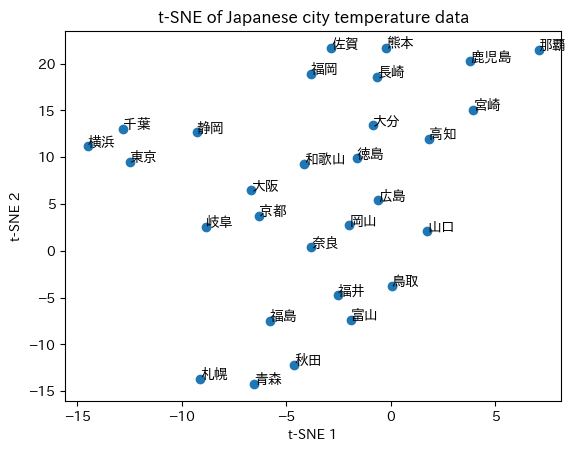

In [ ]:
# t-SNEのインスタンスを作成
# perplexityを10に設定
model = TSNE(n_components=2, perplexity=10)

# t-SNEを実行
tsne_result = model.fit_transform(X)

# 結果を表示
print('次元削減されたデータ')
print(tsne_result, '\n')

# 散布図を表示
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Japanese city temperature data')

# 図中に各点の地名を表示
for i in range(df_part.shape[0]):
    plt.annotate(df_part.index[i], xy=(tsne_result[i, 0], tsne_result[i, 1]))

【課題】perplexityの値を[5, 7, 10, 15, 25]と変化させて2次元へのt-SNEを行い、それぞれの結果を散布図で表示してください。

*   それぞれの散布図は重ね描きではなく別々の図にしてください。「プログラミングⅡ」第11,12回で扱ったplt.show()を使いましょう。
*   それぞれの散布図のタイトルは「t-SNE of Japanese city temperature data (perplexity=XXXX)」としてください。XXXXの部分には、format()を使って実際のperplexityの値を入れてください。


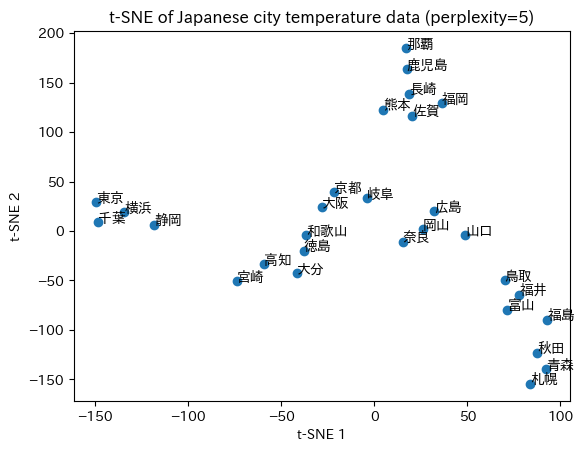

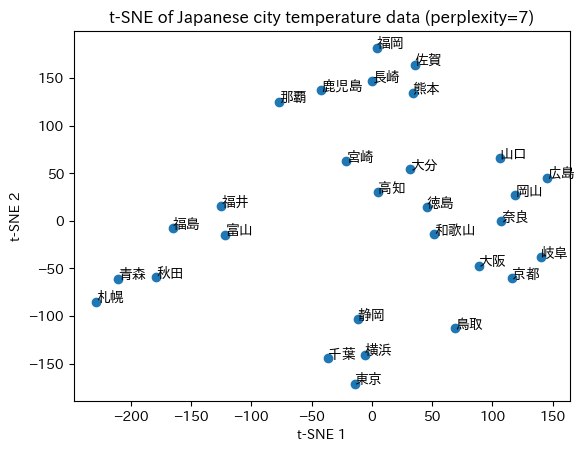

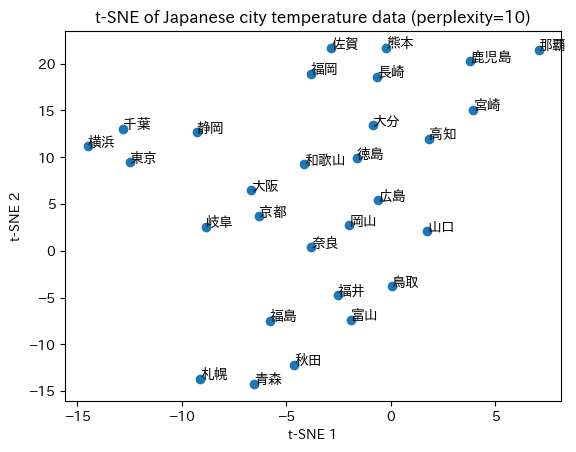

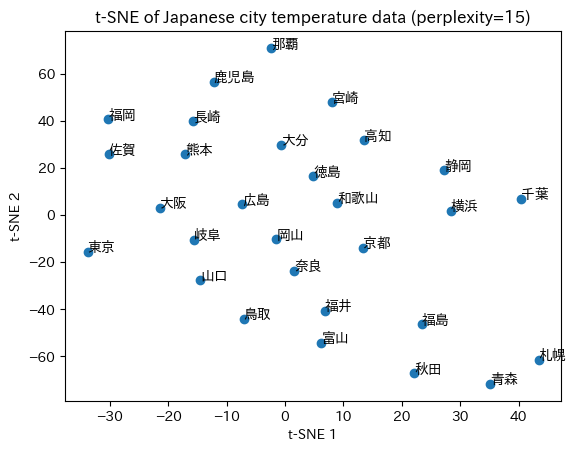

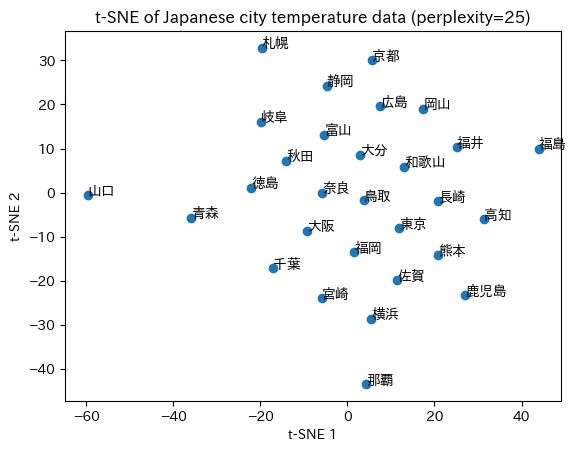

In [ ]:
# perplexityのリスト
pplex_list = [5, 7, 10, 15, 25]

# forを回して、各perplexityについてt-SNEを行い、結果を散布図で表示
for p in pplex_list:
    # perplexityの値を指定してt-SNEを実行
    model = TSNE(n_components=2, perplexity=p)
    tsne_result = model.fit_transform(X)
    # 散布図を表示
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    # タイトルにperplexityの値を表示
    plt.title('t-SNE of Japanese city temperature data (perplexity={})'.format(p))
    for i in range(df_part.shape[0]):
        plt.annotate(df_part.index[i], xy=(tsne_result[i, 0], tsne_result[i, 1]))
    # 別々の図にする
    plt.show()

In [ ]:
#### K-meansクラスタリング
# 例として、また日本の気温データを使用します。
# 「29の都市それぞれが367次元の気温情報として表されたデータ」と見て、
# 都市を気温情報にもとづいてクラスタリングします。

# データの準備
import numpy as np
import pandas as pd
import gdown
url='https://drive.google.com/uc?export=download&id=1WsveWEwULst41FLQmcgfBGQsejWf6COG'
gdown.download(url, 'japan_temperature.csv', quiet=False)
df = pd.read_csv('japan_temperature.csv')

# 気温部分を抜き出す
df_part = df.iloc[:, 3:]

# 転置して、行を都市、列を日付に
df_part = df_part.T
display(df_part)

# データの前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_part)

Downloading...
From: https://drive.google.com/uc?export=download&id=1WsveWEwULst41FLQmcgfBGQsejWf6COG
To: /content/japan_temperature.csv
100%|██████████| 52.8k/52.8k [00:00<00:00, 17.3MB/s]


,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
札幌,14.3,11.3,10.7,14.7,17.1,15.2,11.0,10.8,9.8,12.0,...,7.3,7.8,10.3,10.1,11.3,15.6,18.2,12.0,10.8,10.7
青森,14.4,13.5,11.5,15.5,19.4,18.9,12.1,10.3,6.2,13.7,...,11.1,11.1,12.0,14.8,13.1,18.1,16.1,16.4,15.4,12.6
秋田,14.3,13.8,11.8,12.9,14.5,16.7,14.5,13.2,7.6,11.2,...,9.8,13.7,17.3,15.7,12.5,16.5,17.2,15.6,16.9,15.4
福島,17.6,17.2,14.1,16.5,19.9,20.9,20.1,11.2,9.7,13.0,...,15.7,15.9,13.5,13.8,16.9,20.9,21.0,22.6,18.5,20.3
千葉,20.5,17.8,17.1,18.2,20.0,21.3,22.6,17.7,13.2,15.0,...,18.2,16.3,16.9,15.9,18.9,20.5,19.6,21.1,21.3,21.3
東京,19.7,17.8,17.4,17.8,19.7,21.1,23.0,17.6,12.9,15.1,...,18.4,15.6,16.9,15.0,19.5,20.3,19.5,21.6,21.2,20.9
横浜,20.4,18.1,17.6,18.5,19.9,20.6,22.5,18.4,13.6,15.6,...,18.6,15.8,17.1,15.2,19.3,20.4,19.3,20.9,21.0,20.8
静岡,20.2,19.4,17.1,18.5,19.8,20.4,22.8,21.1,19.5,16.6,...,18.8,18.5,18.6,16.1,20.0,20.9,18.9,19.9,19.9,20.8
岐阜,17.1,16.5,16.9,18.6,20.0,20.2,21.5,19.6,17.7,17.0,...,17.9,19.8,17.6,15.8,19.0,19.3,19.9,21.9,20.2,19.0
富山,16.3,15.1,14.5,16.9,19.1,21.0,22.3,13.9,12.4,13.4,...,13.9,13.7,14.1,15.0,17.3,17.3,17.9,18.6,16.5,17.1


In [ ]:
# クラスタリングの場合も、今までのsklearnによる解析と似たような流れになります。

# K-meansクラスタリングのモジュールを読み込みます。
from sklearn.cluster import KMeans

# K-meansクラスタリングでは、初期クラスタの割り当てに乱数を使用します。
# 再現性のために、乱数シードを設定しましょう。
# ※課題の採点の都合上、この値は変更しないでください
seed = 42

# K-meansクラスタリングのインスタンスを作ります。
# クラスタ数(何個のクラスタに分けたいか)をn_clustersに指定します。
# 今回は例としてクラスタ数を2に設定します。
# random_stateに乱数シードを指定します。
model = KMeans(n_clusters=2, random_state=seed)

# K-meansクラスタリングを実行します。
# メソッドfit()にXを渡すと、クラスタリングの結果が返ってきます。
kmeans_result = model.fit(X)

# kmeans_resultはオブジェクトであり、
# メンバ変数labels_は、各データがどのクラスタに割り当てられたかを表しています。
print('クラスタの割り当て')
print(kmeans_result.labels_)

# labels_[i]が、i番目のデータのクラスタ番号です。
# 最初の4個のデータがクラスタ0に、残りのデータがクラスタ1に割り当てられました。

クラスタの割り当て
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# どの都市がどのクラスタに割り当てられたか調べるため、
# データフレームの都市名とクラスタ番号を並べて表示します。

print('都市名\tクラスタ番号')
for i in range(df_part.shape[0]):
    print('{}\t{}'.format(df_part.index[i], kmeans_result.labels_[i]))

# 北の方にある4都市がクラスタ0に割り当てられたことが分かります。
# おさらい：「\t」はタブ文字。区切り位置を揃えて表示するのに便利。

都市名	クラスタ番号
札幌	0
青森	0
秋田	0
福島	0
千葉	1
東京	1
横浜	1
静岡	1
岐阜	1
富山	1
福井	1
奈良	1
和歌山	1
大阪	1
京都	1
鳥取	1
岡山	1
広島	1
山口	1
徳島	1
高知	1
福岡	1
大分	1
佐賀	1
熊本	1
長崎	1
宮崎	1
鹿児島	1
那覇	1


【課題】クラスタ数を4に設定してK-meansクラスタリングを行い、都市名とクラスタ番号の対応を表示してください。

*   乱数シードはコード内の指定にしたがってください。

In [ ]:
# K-meansクラスタリングのインスタンスを作成
# クラスタ数を4に設定
# seedは上の例と同じものを用いる
model = KMeans(n_clusters=4, random_state=seed)

# K-meansクラスタリングを実行
kmeans_result = model.fit(X)

# 都市名とクラスタ番号の対応を表示
print('都市名\tクラスタ番号')
for i in range(df_part.shape[0]):
    print('{}\t{}'.format(df_part.index[i], kmeans_result.labels_[i]))

都市名	クラスタ番号
札幌	2
青森	2
秋田	2
福島	0
千葉	1
東京	1
横浜	1
静岡	1
岐阜	0
富山	0
福井	0
奈良	0
和歌山	1
大阪	1
京都	0
鳥取	0
岡山	0
広島	1
山口	0
徳島	1
高知	1
福岡	1
大分	1
佐賀	1
熊本	1
長崎	1
宮崎	1
鹿児島	1
那覇	3


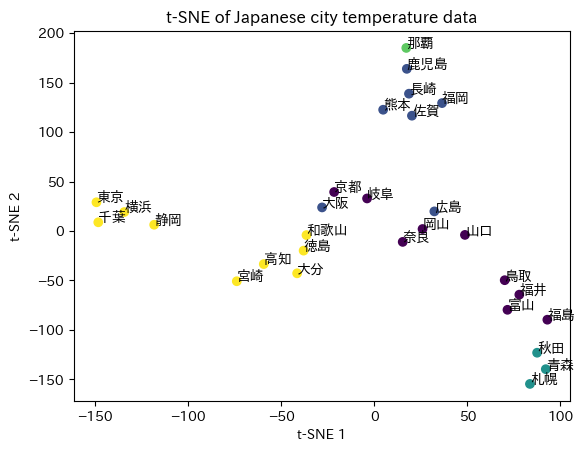

In [ ]:
# クラスタリングの結果を可視化するために、
# t-SNEの2次元プロットにおいて各点をクラスタごとに色分けして表示してみます。

# モジュールの準備
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
from sklearn.manifold import TSNE

# K-meansクラスタリングのインスタンスを作成
# クラスタ数を5に設定
kmeans = KMeans(n_clusters=5, random_state=seed)

# K-meansクラスタリングを実行
kmeans_result = kmeans.fit(X)

# t-SNEのインスタンスを作成
# 次元数を2、perplexityを5に設定
tsne = TSNE(n_components=2, perplexity=5)

# t-SNEを実行
tsne_result = tsne.fit_transform(X)

# 散布図を表示
# scatter()の引数cにクラスタ番号のアレイを渡すと、点ごとに色分けしてくれます。
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_result.labels_)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Japanese city temperature data')

# 図中に各点の地名を表示
for i in range(df_part.shape[0]):
    plt.annotate(df_part.index[i], xy=(tsne_result[i, 0], tsne_result[i, 1]))

【課題】上で計算したkmeans_result.labels_を用いて、PCAの2次元プロットの各点をクラスタごとに色分けして表示してください。

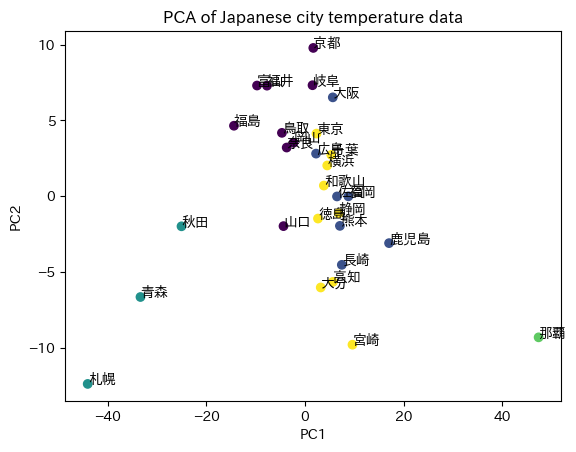

In [ ]:
# モジュールの準備
from sklearn.decomposition import PCA

# PCAのインスタンスを作成
# 次元数を2に設定
pca = PCA(n_components=2)

# PCAを実行
pca_result = pca.fit_transform(X)

# 散布図を表示
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_result.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Japanese city temperature data')

# 図中に各点の地名を表示
for i in range(df_part.shape[0]):
    plt.annotate(df_part.index[i], xy=(pca_result[i, 0], pca_result[i, 1]))

In [ ]:
#### 凝集型クラスタリング
# K-means以外のクラスタリング手法として、
# 「人工知能・機械学習入門」で学んだ凝集型クラスタリングを行います。
# 凝集型クラスタリングの場合も、全体の流れはK-meansの場合と変わりません。

# モジュールの準備
from sklearn.cluster import AgglomerativeClustering

# データの前処理
scaler = StandardScaler()
X = scaler.fit_transform(df_part)

# 凝集型クラスタリングのインスタンスを作成
# 例としてクラスタ数を4に設定
model = AgglomerativeClustering(n_clusters=4)

# 凝集型クラスタリングを実行
agglo_result = model.fit(X)

print('クラスタの割り当て')
print(agglo_result.labels_, '\n')

print('都市名\tクラスタ番号')
for i in range(df_part.shape[0]):
    print('{}\t{}'.format(df_part.index[i], agglo_result.labels_[i]))

クラスタの割り当て
[1 1 1 3 0 0 0 0 0 3 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 2] 

都市名	クラスタ番号
札幌	1
青森	1
秋田	1
福島	3
千葉	0
東京	0
横浜	0
静岡	0
岐阜	0
富山	3
福井	3
奈良	0
和歌山	0
大阪	0
京都	0
鳥取	3
岡山	0
広島	0
山口	0
徳島	0
高知	0
福岡	0
大分	0
佐賀	0
熊本	0
長崎	0
宮崎	0
鹿児島	0
那覇	2


In [ ]:
# クラスタ間の距離指標には、デフォルトではWard法が使用されます。
# 変更するには、引数linkageを指定します。
# linkage='ward': Ward法
# linkage='complete': 完全連結法
# linkage='average': 平均連結法
# linkage='single': 単連結法

# クラスタ数を4に設定
# クラスタ間の距離指標に単連結法を指定
model = AgglomerativeClustering(n_clusters=4, linkage='single')

# 凝集型クラスタリングを実行
agglo_result = model.fit(X)

print('都市名\tクラスタ番号')
for i in range(df_part.shape[0]):
    print('{}\t{}'.format(df_part.index[i], agglo_result.labels_[i]))

都市名	クラスタ番号
札幌	3
青森	0
秋田	0
福島	2
千葉	2
東京	2
横浜	2
静岡	2
岐阜	2
富山	2
福井	2
奈良	2
和歌山	2
大阪	2
京都	2
鳥取	2
岡山	2
広島	2
山口	2
徳島	2
高知	2
福岡	2
大分	2
佐賀	2
熊本	2
長崎	2
宮崎	2
鹿児島	2
那覇	1


【課題】クラスタ間の距離指標を平均連結法、クラスタ数を4に設定して凝集型クラスタリングを行い、都市とクラスタ番号の対応を表示してください。

In [ ]:
# クラスタ数を4に設定
# クラスタ間の距離指標に平均連結法を指定
model = AgglomerativeClustering(n_clusters=4, linkage='average')

# 凝集型クラスタリングを実行
agglo_result = model.fit(X)

print('都市名\tクラスタ番号')
for i in range(df_part.shape[0]):
    print('{}\t{}'.format(df_part.index[i], agglo_result.labels_[i]))

都市名	クラスタ番号
札幌	3
青森	2
秋田	2
福島	0
千葉	0
東京	0
横浜	0
静岡	0
岐阜	0
富山	0
福井	0
奈良	0
和歌山	0
大阪	0
京都	0
鳥取	0
岡山	0
広島	0
山口	0
徳島	0
高知	0
福岡	0
大分	0
佐賀	0
熊本	0
長崎	0
宮崎	0
鹿児島	0
那覇	1


In [ ]:
# ここまでの例では、凝集型クラスタリングのクラスタ数を指定していました。
# クラスタ数ではなくクラスタ間の距離の閾値を指定したい場合、以下のようにします。

# 引数n_clustersをNoneに設定して、
# 代わりに引数distance_thresholdにクラスタ間の距離の閾値を指定
model = AgglomerativeClustering(n_clusters=None, distance_threshold=50)

# 凝集型クラスタリングを実行
agglo_result = model.fit(X)

# 何個のクラスタに分かれたか
print('クラスタ数')
print(agglo_result.n_clusters_, '\n')

print('都市名\tクラスタ番号')
for i in range(df_part.shape[0]):
    print('{}\t{}'.format(df_part.index[i], agglo_result.labels_[i]))

# クラスタ間の距離の閾値を50にしてクラスタを同定した結果、
# 3つのクラスタに分かれました

クラスタ数
3 

都市名	クラスタ番号
札幌	1
青森	1
秋田	1
福島	0
千葉	0
東京	0
横浜	0
静岡	0
岐阜	0
富山	0
福井	0
奈良	0
和歌山	0
大阪	0
京都	0
鳥取	0
岡山	0
広島	0
山口	0
徳島	0
高知	0
福岡	0
大分	0
佐賀	0
熊本	0
長崎	0
宮崎	0
鹿児島	0
那覇	2


Text(0, 0.5, 'Cluster distance')

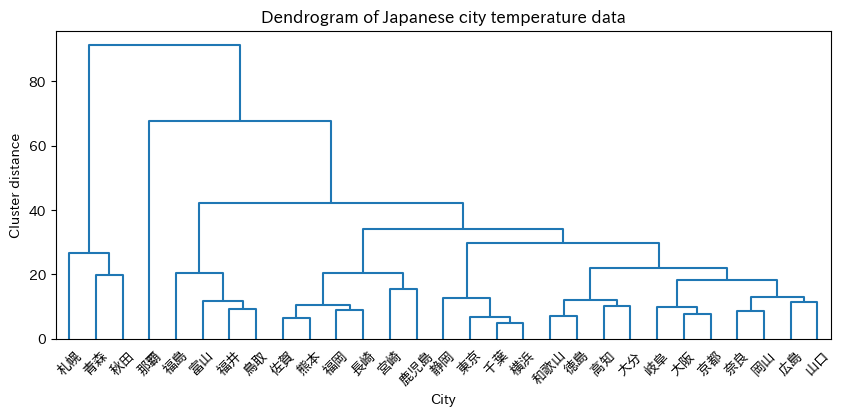

In [ ]:
# sklearnの凝集型クラスタリングでは、デンドログラムを表示するのが少々面倒です。
# クラスタの割り当てだけでなくデンドログラムも見たい場合、
# scipyを使うのが便利です。
from scipy.cluster.hierarchy import dendrogram, linkage

# linkage()でデンドログラムを計算
# クラスタ間の距離指標は引数methodで指定
Z = linkage(X, method='ward')

# dendrogram()でデンドログラムを図示
# labels: 葉ノードの下に表示されるラベル
# color_threshold: 0にすると全ての枝が同じ色で表示される
# color_thresholdを指定しないと近い枝ごとに色分けされる
plt.figure(figsize=(10, 4))
dendrogram(Z, labels=df_part.index,  color_threshold=0)
plt.title('Dendrogram of Japanese city temperature data')
plt.xlabel('City')
plt.ylabel('Cluster distance')

【課題】クラスタ間の距離指標に平均連結法を用いた場合のデンドログラムを表示してください。

Text(0, 0.5, 'Cluster distance')

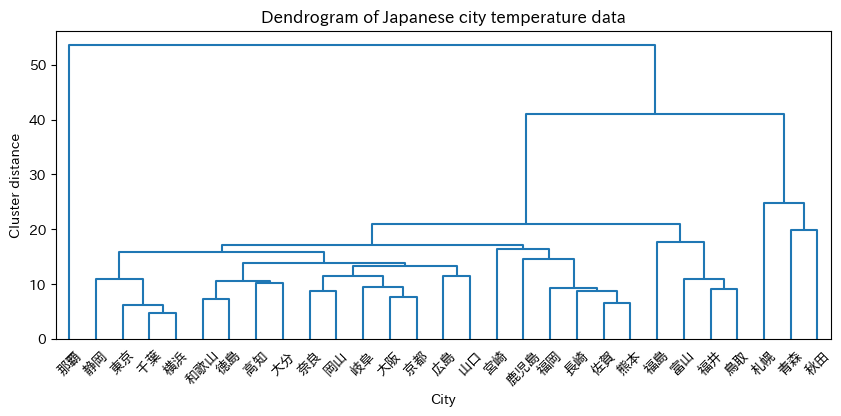

In [ ]:
# linkage()でデンドログラムを計算
# クラスタ間の距離指標に平均連結法を使用
Z = linkage(X, method='average')

# dendrogram()でデンドログラムを図示
plt.figure(figsize=(10, 4))
dendrogram(Z, labels=df_part.index,  color_threshold=0)
plt.title('Dendrogram of Japanese city temperature data')
plt.xlabel('City')
plt.ylabel('Cluster distance')